# PARTIE THÉORIQUE 

## Introduction

Le développement d’un modèle de Machine Learning repose sur quatre étapes principales :

-Sélection et préparation d'un ensemble de données d’entraînement.

-Sélection  d'un algorithme à exécuter sur l’ensemble des données. Le type d’algorithme à utiliser dépend du problème et du type de volume de données d’entraînement.

-Entraînement de l’algorithme. Les résultats sont comparés avec ceux qu’il aurait du produire. Les "poids" et le biais peuvent ensuite être ajustés pour accroître la précision du résultat.
On exécute ensuite de nouveau les variables jusqu’à ce que l’algorithme produise un résultat acceptable.

-Utilisation et amélioration du modèle. On utilise le modèle sur de nouvelles données, dont la provenance dépend du problème à résoudre.

# Matrice de confusion 

On utilise généralement la matrice de confusion, appelée aussi tableau de contingence pour mettre en valeur les prédictions correctes et incorrectes. Elle donnera surtout un indice sur le type d’erreurs commises. Pour calculer une matrice de confusion, on a besoin d’un ensemble de données de test et un autre de validation qui contient les valeurs des résultats obtenus.
Pour calculer une matrice de confusion, on a besoin d’un ensemble de données de test et un autre de validation qui contient les valeurs des résultats 
obtenus.

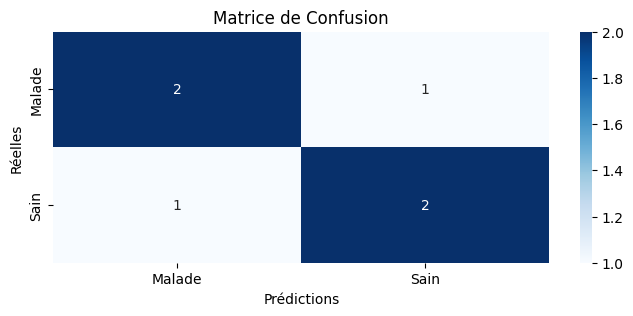

In [1]:
# Exemple 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de valeurs réelles et prédites 
y_true = ['malade', 'sain', 'sain', 'malade', 'malade', 'sain']
y_pred = ['malade', 'malade', 'sain', 'sain', 'malade', 'sain']

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Affichage 
plt.figure(figsize=(8, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=['Malade', 'Sain'], 
            yticklabels=['Malade', 'Sain'])
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title('Matrice de Confusion')
plt.show()

# Les Métriques

### Qu'est ce que c'est ? À quoi ça sert ? 


Les métriques en machine learning sont des mesures quantitatives qui permettent d'évaluer la performance d'un modèle en comparant ses prédictions avec les valeurs réelles. 
Voici quelques-unes des métriques les plus couramment utilisées en apprentissage automatique :

# Accuracy

# Precision 



Comme les autres métriques, l’accuracy est basée sur la matrice de confusion.

Un modèle parfait (perfect model/classifier) est un modèle qui sépare parfaitement les individus positifs des individus négatifs.

Nous pouvons prévoir théoriquement l’accuracy d’un modèle parfait. Selon le seuil de classification utilisé, 3 cas sont possibles :

Seuil trop faible : on prédit correctement les positifs mais on se trompe sur les négatifs : l’accuracy est sous-optimale et croît à mesure que le seuil augmente.

Seuil optimal (séparation parfaite des deux classes) : on ne se trompe ni sur les positifs ni sur les négatifs : l’accuracy est maximale (100%).
    
Seuil trop élevé : on prédit correctement les négatifs mais on se trompe sur les positifs : l’accuracy est à nouveau sous-optimale et décroît à mesure que le seuil augmente.

<img src='/home/louis/Documents/projects/ML_avance/img/Capture d’écran du 2024-01-24 15-54-29.png'>  

# Recall (Rappel)

Le racall mesure la capacité du modèle à "se rappeler" ou à "capturer" le plus possible d'exemples positifs. Un rappel élevé indique que le modèle est efficace pour identifier la plupart des exemples positifs, minimisant donc les faux négatifs.

Le choix du rappel comme métrique est particulièrement important dans des situations où les faux négatifs sont nombreux et susceptible de perturber le modèle. Par exemple, dans un système de détection de fraude, il est crucial de minimiser le nombre de transactions frauduleuses non détectées (faux négatifs), même au détriment d'un nombre accru de transactions saines incorrectement identifiées comme frauduleuses (faux positifs).

Le rappel fournit une mesure de la sensibilité du modèle aux exemples positifs, et son utilisation dépend du contexte et de nos besoins.

Aussi simple que pour la precision ! On remplace cette fois si les Faux positifs par les Faux négatifs 

<img src='/home/louis/Documents/projects/ML_avance/img/Capture d’écran du 2024-01-24 16-06-31.png'>  

# La valeur F1

Le score F1 est une mesure d'évaluation de l'apprentissage automatique qui mesure la précision d'un modèle. Il combine la précision et les scores de rappel d'un modèle.

La métrique de précision calcule combien de fois un modèle a fait une prédiction correcte sur l'ensemble de l'ensemble des données. Il ne peut s'agir d'une métrique fiable que si l'ensemble de données est équilibré en classe, c'est-à-dire que chaque classe de l'ensemble de données a le même nombre d'échantillons.

Néanmoins, les ensembles de données du monde réel sont fortement équilibrés en classe, ce qui rend souvent cette métrique non viable. Par exemple, si un ensemble de données de classe binaire a respectivement 90 et 10 échantillons dans la classe 1 et la classe 2, un modèle qui ne prédit que « la classe 1 », quel que soit l'échantillon, sera toujours précis à 90 %. La précision calcule combien de fois un modèle a fait une prédiction correcte sur l'ensemble des données. Cependant, ce modèle peut-il être appelé un bon prédicteur ? C'est là que le score de F1 entre en jeu.

Nous allons examiner l'explication mathématique derrière la métrique dans la section suivante, mais comprenons d'abord la précision et le rappel par rapport à un ensemble de données de classe binaire avec des classes étiquetées « positives » et « négatives ».

La précision mesure combien de prédictions « positives » faites par le modèle étaient correctes.

Rappelez-vous que le nombre d'échantillons de classe positive présents dans l'ensemble de données ont été correctement identifiés par le modèle.

La précision et le rappel offrent un compromis, c'est-à-dire qu'une métrique se fait au détriment d'une autre. Plus de précision implique un critique plus sévère (classifiant) qui doute même des échantillons positifs réels de l'ensemble de données, réduisant ainsi le score de rappel. D'autre part, plus de rappel implique un critique laxiste qui permet à tout échantillon qui ressemble à une classe positive de passer, ce qui rend les échantillons négatifs de cas de limite classés comme « positifs », réduisant ainsi la précision. Idéalement, nous voulons maximiser à la fois la précision et les métriques de rappel pour obtenir le classificateur parfait.

Le score F1 combine précision et rappel en utilisant leur moyenne harmonique, et le fait de maximiser le score F1 implique simultanément de maximiser à la fois la précision et le rappel. Ainsi, le score F1 est devenu le choix des chercheurs pour évaluer leurs modèles en conjonction avec la précision.

<img src ='/home/louis/Documents/projects/ML_avance/img/Capture d’écran du 2024-01-24 16-21-25.png'>

<img src ='/home/louis/Documents/projects/ML_avance/img/Capture d’écran du 2024-01-24 16-17-50.png'>

# EXERCICE 

## Importation des librairies


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

Pour cette exercice nous allons utiliser de nouveaux le dataset diabetes.csv



In [ ]:
df = pd.read_csv('')

In [5]:
# Train/Test split
x_train, x_test, y_train, y_test = train_test_split(df.hoursOfStudy, df.passing, test_size=0.4, random_state=321)

# Reshape indep variables of training data
x_train_array = np.array(x_train).reshape(-1,1)# Build a model
logistic = LogisticRegression() # Fit a model
model = logistic.fit(x_train_array, y_train)

# Reshape indep variables of testing data
x_test_array = np.array(x_test).reshape(-1,1)

# Make prediction
y_pred = model.predict(x_test_array)# Calculate confusion matrix and assign to the variables
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

NameError: name 'df' is not defined

Evaluer l'Accuracy, la Precision, le Recall et interpréter ces résultats.

D'après vous, vaut-il mieux être confronté à des erreurs de type 1 ou de type 2 avec ce jeu de donnée ?

Calculer F1
Que pouvez vous en déduire ?